![title](img/gd.png)



Here we have a formula for Batch Gradient Descent, found in the Wild on the Internet.  If you are unfamiliar with some of the symbols, here's a refresher (or introduction, depending on where you are in your math studies).  

The goal of is to minimize cost function J.

In this notebook, we'll look at some of the math notation and show you a working example in Python. You should already have an intuition for how Gradient Descent works, but if you don't, watch some youtube videos or observe this animation.

![title](img/gradient_descent_example.gif 'test')


<center>source: https://github.com/mattnedrich/GradientDescentExample</center>

Let's start with...

## Greek symbols
### Sigma

![title](img/sigma.png)

This is a Sigma, the eighteenth letter of the Greek Alphabet.  When it appears like this in a formula, it's a Summation operator.  In code, it's a for loop. The number below the Sigma is the index start, the number above is the index end, and the content to the right is the body of the function we're iterating over.

![title](img/summation_example.png)

In [78]:
# A simple Python implementation of the formula

sum(i**2 for i in range(3, 6+1))

86

### Theta
![title](img/gd_theta_focus.png)
![title](img/theta.png)

Theta is a symbol often used to denote the unknown measure of an angle.  In Python this term is represented using alphanumeric variable names, as Python doesn't directly support greek symbols. 

It's useful in formulas, because when we see it, we can say to ourselves, "Oh.  We're calculating angles."

Sometimes you'll see theta represented by two points. At other times you may see the two points are converted to a single floating point value (radians).

In [79]:
import math

# 1° × π/180 = 0.01745rad

# Get the the angle (in radians) from the X -Axis to the specified point (y, x)

theta_1 = math.atan2(15,4)
print(theta_1)

1.3101939350475555


$$\LARGE\LARGE\alpha$$

### Alpha

![title](img/alpha.png)

In math, you'll see a stretched-out, italic lowercase version of this Greek Alpha character.  It typically means "is proportional to", but can also just stand in as some constant or variable.  In this case, it's a constant representing the Learning Rate.


![title](img/gd_alpha_focus.png)

## The "Pascal" assignment operator

One other symbol which might confuse a working Python programmer would be this one:
# :=    
This notation (a colon followed by an equals sign) comes from coding wierdly enough.  But unless you've worked in ALGOL and Pascal, you probably missed it. In Python, Javascript, C and JAVA (and others) assignment is done using the = equals sign and == is used for equivalency.  

In [80]:
# theta1 := theta1 + 1  It's just basic assignment.
theta1 = 0
theta1 = theta1 + 1


You probably already know this, but for completeness I'll mention the notation of a variable followed by a 
small letter lowered on the right is a **subscript**, which is an index into an array.

And a variable followed by a small letter up top on the right is an **exponent**.

Enough with interpreting the formula.  Here's a Python implementation that directly corresponds.  This version was modified slightly from the orginal to capture the changes over time for sake of the animation below.  The variable "changes" is returned along with the final theta t0 and t1.  It's important to keep in mind this is extra cruft and not part of the algorithm. 

<script src="https://gist.github.com/saraswatmks/f460c1113ed2d3c999e1324f76fceb43.js"></script>

In [81]:
# src: https://gist.github.com/saraswatmks/f460c1113ed2d3c999e1324f76fceb43#file-gradient_descent

import numpy as np
import random


def gradient_descent(alpha, x, y, ep=0.0001, max_iter=10000):
    converged = False
    iter = 0
    m = x.shape[0] # number of samples
    changes = []   # for animation

    # initial theta
    t0 = np.random.random(x.shape[1])
    t1 = np.random.random(x.shape[1])

    # total error, J(theta)
    J = sum([(t0 + t1*x[i] - y[i])**2 for i in range(m)])

    # Iterate Loop
    while not converged:
        # for each training sample, compute the gradient (d/d_theta j(theta))
        grad0 = 1.0/m * sum([(t0 + t1*x[i] - y[i]) for i in range(m)]) 
        grad1 = 1.0/m * sum([(t0 + t1*x[i] - y[i])*x[i] for i in range(m)])
        #print(t0, t1)
        # update the theta_temp
        temp0 = t0 - alpha * grad0
        temp1 = t1 - alpha * grad1
    
        # update theta
        t0 = temp0
        t1 = temp1
        
        changes.append((t0,t1))

        # mean squared error
        e = sum( [ (t0 + t1*x[i] - y[i])**2 for i in range(m)] ) 

        if abs(J-e) <= ep:
            print('Converged after {} iterations', iter )
            converged = True
    
        J = e   # update error 
        iter += 1  # update iter
    
        if iter == max_iter:
            print('Max interactions exceeded!')
            converged = True

    return t0,t1, changes

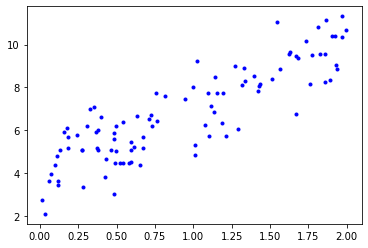

In [82]:
# snippet adapted from src: https://gist.github.com/sagarmainkar/41d135a04d7d3bc4098f0664fe20cf3c

import numpy as np
import matplotlib.pyplot as plt

def get_random_points():
    X = 2 * np.random.rand(100,1)
    y = 4 + 3 * X+np.random.randn(100,1)
    return X, y

fig = plt.figure()

X, y = get_random_points()
plt.plot(X,y,'b.');


Converged after {} iterations 133


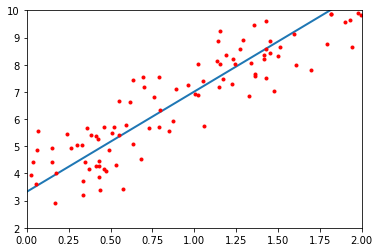

In [84]:
from matplotlib import animation 
from IPython.display import HTML

x1 = np.array([0., 2.])
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((2, 10))

line, = ax.plot([], [], lw=2)

X, y = get_random_points()
w1, b1, changes  = gradient_descent(0.2, X, y, max_iter=200)

# w1, b1 contains our best fit line, but let's initialize from the first 
# random (before applying gradient_descent)

y1 = x1 * changes[0][0] + changes[0][1]
plt.plot(X,y,'r.');

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    w1, b1 = changes[i]
    y1 = x1 * w1 + b1
    line.set_data(x1, y1)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=50, 
                               blit=True)

HTML(anim.to_html5_video())